<h3>Tutorial notebook for:</h3>

 - Loading selected datasets and models
 - Generating Global Counterfactual Explanations (GCEs) with AReS

# Preamble

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
%load_ext autoreload
%autoreload 2

In [2]:
def bold(string):
    return '\033[1m' + string + '\033[0m'

# Select Dataset

In [3]:
from datasets import dataset_loader

In [4]:
name = 'german_credit'  # from compas, german_credit, default_credit, adult_income, heloc
dropped_features = []#UCIDatasets().continuous_features[dataset]
dataset = dataset_loader(name, dropped_features=dropped_features, n_bins=None)

<strong> Do not normalise input data (AReS will handle it) </strong>

<strong> Do not shuffle input data (ensures same train/test split and normalisation values) </strong>

In [5]:
x_train, y_train, x_test, y_test, x_means, x_std = dataset.get_split(normalise=False, shuffle=False,
                                                                     return_mean_std=True)
prop1s = round(np.average(y_train)*100, 2)
print(bold("Proportion of 1s in Training Data:") + " {}%".format(prop1s))

Proportion of 1s in Training Data: 70.12%


In [6]:
X = pd.DataFrame(x_train)
X.columns = dataset.features[:-1]
X_test = pd.DataFrame(x_test)
X_test.columns = dataset.features[:-1]
print(bold("Dataset:") + " {}\n".format(name.replace('_', ' ').title()))
X

Dataset: German Credit



,Existing-Account-Status = A11,Existing-Account-Status = A12,Existing-Account-Status = A13,Existing-Account-Status = A14,Month-Duration,Credit-History = A30,Credit-History = A31,Credit-History = A32,Credit-History = A33,Credit-History = A34,...,Job = A171,Job = A172,Job = A173,Job = A174,Num-People = 1,Num-People = 2,Telephone = A191,Telephone = A192,Foreign-Worker = A201,Foreign-Worker = A202
0,1,0,0,0,6,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,0,1,0,0,48,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
2,0,0,0,1,12,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,1,0,0,0,42,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
4,1,0,0,0,24,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,1,9,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
796,1,0,0,0,18,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0
797,0,0,0,1,12,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
798,0,0,0,1,24,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0


# Select Model

In [7]:
from models import performance

In [ ]:
B_name = 'lr'  # or 'lr' or 'xgb'
if B_name == 'dnn':
    from models import dnn_normalisers as normalisers
elif B_name == 'lr':
    from models import lr_normalisers as normalisers
else:  # no xgb normalisation
    normalisers = {name: False}
with open('models/{}_{}.pkl'.format(name, B_name), 'rb') as f:
    B = pickle.load(f)
normalise = [x_means, x_stds] if normalisers[name] else None

In [9]:
print(bold("Dataset:") + " {}".format(name.replace('_', ' ').title()))
print(bold("Model:") + " {}\n".format(B_name.replace('_', ' ').upper()))
performance(B, x_train, x_test, y_train, y_test, normalise=normalise)

Dataset: German Credit
Model: LR

Train Accuracy: 78.88%
Test Accuracy: 75.5%
Proportion of 1s Predicted (Train): 77.5%
Proportion of 1s Predicted (Test): 71.0%


# AReS

### Initialise AReS class object

In [10]:
# The best implementation would generate 1000 triples
# check performance, generate another 500 etc

In [11]:
# initialise, compute SD/RL, compute V (with fast AReS), optimise

In [12]:
from ares import Apriori, TwoLevelRecourseSet, AReS

In [13]:
# affected subgroup at most one itemset (of multiple feature values)

In [14]:
ares = AReS(model=B, dataset=dataset, X=X, dropped_features=[],
            n_bins=10, ordinal_features=[], normalise=normalisers[name],
            constraints=[20,7,10])  # 1MB

In [15]:
ares.X_aff  # note that continuous features have been binned

,Existing-Account-Status = A11,Existing-Account-Status = A12,Existing-Account-Status = A13,Existing-Account-Status = A14,"Month-Duration = (3.932, 10.8]","Month-Duration = (10.8, 17.6]","Month-Duration = (17.6, 24.4]","Month-Duration = (24.4, 31.2]","Month-Duration = (31.2, 38.0]","Month-Duration = (38.0, 44.8]",...,Job = A171,Job = A172,Job = A173,Job = A174,Num-People = 1,Num-People = 2,Telephone = A191,Telephone = A192,Foreign-Worker = A201,Foreign-Worker = A202
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0
176,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
177,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
178,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
# Compute candidate sets of conditions (SD and RL)
ares.generate_itemsets(apriori_threshold=0.2, max_width=None, # defaults to e2-1
                       affected_subgroup=None, save_copy=True)

In [17]:
# Compute a ground set of valid triples V
# Note that the estimated speed in the progress bar will increase exponentially
# Max width = None automatically uses ares.e2 (width constraint passed to __init__)
ares.generate_groundset(max_width=None, RL_reduction=True,
                        then_generation=None, save_copy=False)

Computing Ground Set of Triples V
Reducing RL
RL Reduced from Size 1322 to 411


100%|██████████| 1322/1322 [00:06<00:00, 197.07it/s]

Ground Set Computed with Length 238374


2999it [00:04, 661.49it/s]


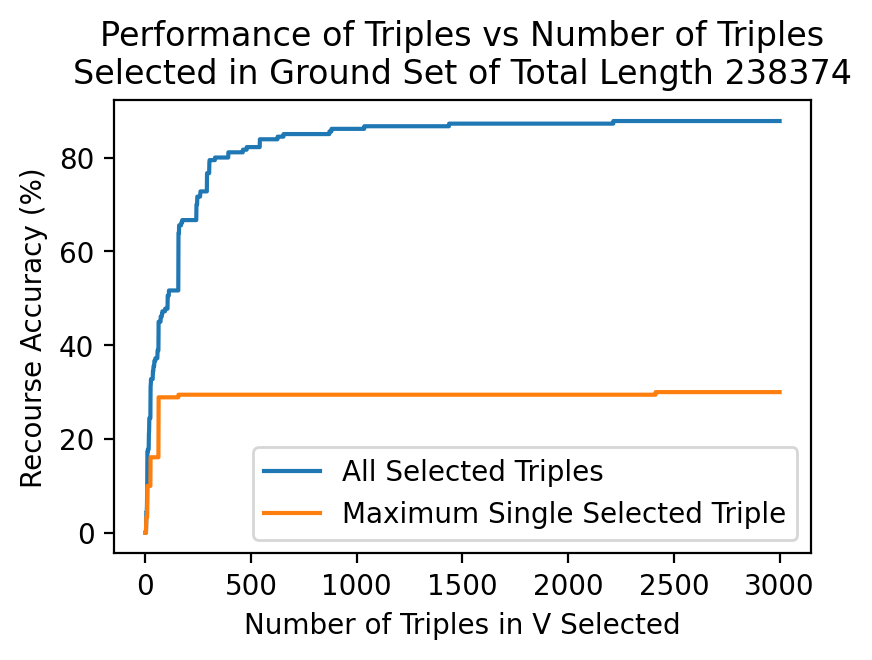

In [18]:
# custom objective function with [accuracy, average cost]
# set lams = [_, _, _, _] for original AReS
lams = [1, 0]

# save_mode: 1 and 2 correspond to r and r' in the Fast AReS paper
# save_mode: 1 and 2 will overwrite the ground set, 0 will not
# use save_mode=0 alongside plot_accuracy=True first
# to get an idea of how many triples you need to evaluate
ares.evaluate_groundset(lams=lams, r=3000, save_mode=1,
                        disable_tqdm=False, plot_accuracy=True)

In [19]:
ares.select_groundset(s=1000)  # can rerun this- if you want to go back mid optimisation, that's fine too

Candidate Set Filtered with Length: 1000


Initialising Copy of Ground Set
While there exists a delete/update operation, loop:
Checking Delete
Checking Add


100%|██████████| 999/999 [00:00<00:00, 176633.91it/s]


Checking Exchange


100%|██████████| 987/987 [00:00<00:00, 2638.06it/s]


Checking Delete
Checking Add


100%|██████████| 987/987 [00:00<00:00, 345470.92it/s]


Checking Exchange


100%|██████████| 987/987 [00:00<00:00, 2747.00it/s]
12it [00:00, 1064.95it/s]


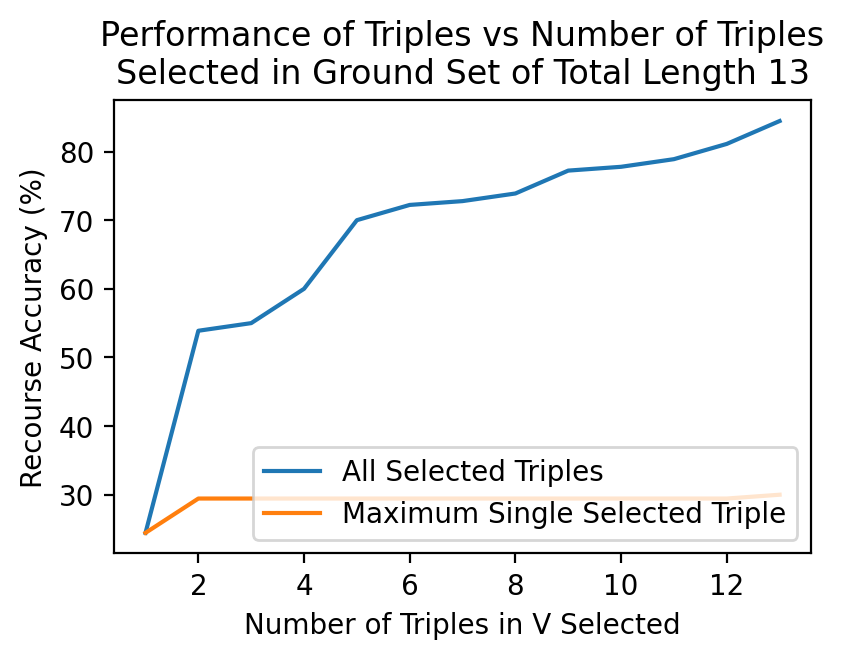

0.8465111255645752


In [20]:
start_time = time.time()
ares.optimise_groundset(lams=lams, factor=1, print_updates=False, print_terms=False)
print(time.time() - start_time)

In [21]:
print(bold("Accuracy:") + " {}%".format(round(ares.R.accuracy, 2)))
# only inputs with positive counterfactual predictions
print(bold("Average Cost:") + " {}".format(round(ares.R.average_cost, 2)))

print(bold("\nAccuracy Upper Bound (Evaluated/Sorted Ground Set):")
      + " {}%".format(round(ares.V.accuracy, 2)))

Accuracy: 84.44%
Average Cost: 1.0

Accuracy Upper Bound (Evaluated/Sorted Ground Set): 87.78%


In [24]:
print(bold("Final Triples Post-Optimisation\n"))
for triple in ares.R.triples:
    outer_ifs, inner_ifs, thens = [sorted([j for j in triple[i]]) for i in range(3)]
    print(bold("If") + " {}".format(', '.join(outer_ifs)))
    print(bold("\t  If") + " {}".format(', '.join(inner_ifs)))
    print(bold("\tThen") + " {}\n".format(', '.join(thens)))

Final Triples Post-Optimisation

If Guarantors = A101, Telephone = A191
	  If Existing-Account-Status = A11, Foreign-Worker = A201, Installment = A143
	Then Existing-Account-Status = A14, Foreign-Worker = A201, Installment = A143

If Guarantors = A101, Num-People = 1
	  If Existing-Account-Status = A12
	Then Existing-Account-Status = A14

If Housing = A152, Telephone = A191
	  If Job = A173
	Then Job = A172

If Credit-History = A32, Foreign-Worker = A201
	  If Num-People = 1, Sex = A92
	Then Num-People = 1, Sex = A93

If Foreign-Worker = A201, Job = A173
	  If Existing-Account-Status = A11, Num-People = 1
	Then Existing-Account-Status = A14, Num-People = 1

If Housing = A152, Telephone = A191
	  If Foreign-Worker = A201, Guarantors = A101, Instalment-Rate = 4
	Then Foreign-Worker = A201, Guarantors = A101, Instalment-Rate = 2

If Credit-History = A32, Foreign-Worker = A201
	  If Installment = A143, Telephone = A191
	Then Installment = A143, Telephone = A192

If Foreign-Worker = A201, J